# <U>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>EMAIL :</u> advaitchavan135@gmail.com
# CDAC NODIA PGDAI -- DATA ANALYTICS -- ASSIGNMENT -- 4

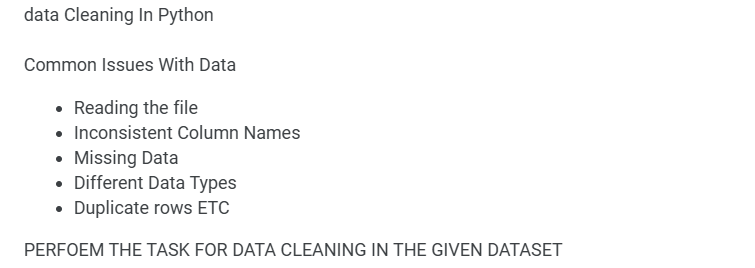

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Cleaned_data.csv", encoding="ISO-8859-1")
print("Initial DataFrame Info:")
print(df.info())

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                12 non-null     object 
 1   num_critic_for_reviews     12 non-null     int64  
 2   duration                   12 non-null     float64
 3   DIRECTOR_facebook_likes    9 non-null      float64
 4   actor_3_facebook_likes     12 non-null     int64  
 5   ACTOR_1_facebook_likes     12 non-null     int64  
 6   gross                      12 non-null     int64  
 7   num_voted_users            11 non-null     float64
 8   Cast_Total_facebook_likes  12 non-null     float64
 9   facenumber_in_poster       12 non-null     float64
 10  num_user_for_reviews       12 non-null     int64  
 11  budget                     12 non-null     int64  
 12  title_year                 12 non-null     int64  
 13  ACTOR_2_facebook_likes     1

In [3]:
df.describe()

,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,profit
count,12.000000,12.000000,9.000000,12.000000,12.000000,1.200000e+01,1.100000e+01,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000,1.200000e+01
mean,477.333333,149.583333,2652.333333,5189.250000,18990.833333,2.875561e+08,4.235617e+05,44379.916667,1.750000,1542.500000,2.467250e+08,2010.250000,7749.166667,7.083333,4.083111e+07
std,164.595556,18.710514,7259.105420,7921.303544,13978.653836,1.211615e+08,2.588885e+05,32294.908097,0.917011,819.263916,2.620545e+07,3.671141,7789.470852,0.684681,1.207874e+08
min,302.000000,106.000000,10.000000,161.000000,451.000000,7.305868e+07,2.122040e+05,1873.000000,1.000000,387.000000,2.000000e+08,2006.000000,393.000000,6.100000,-1.906413e+08
25%,362.250000,146.250000,20.000000,495.750000,8449.750000,2.000730e+08,2.853390e+05,21262.500000,1.000000,988.750000,2.400000e+08,2007.000000,612.250000,6.675000,-3.495514e+07
50%,418.500000,152.000000,282.000000,1000.000000,21000.000000,3.056806e+08,3.307840e+05,46055.000000,1.500000,1240.500000,2.500000e+08,2009.500000,5000.000000,7.000000,3.068057e+07
75%,610.250000,153.750000,563.000000,5500.000000,26250.000000,3.581559e+08,4.669445e+05,51052.750000,2.000000,2018.250000,2.585000e+08,2012.750000,11000.000000,7.500000,1.096950e+08
max,813.000000,183.000000,22000.000000,23000.000000,40000.000000,4.589916e+08,1.144337e+06,106759.000000,4.000000,3018.000000,3.000000e+08,2016.000000,23000.000000,8.500000,2.089916e+08


### A. Remove duplicate columns and rows if any

In [4]:
if "title_year.1" in df.columns:
    # Convert both to numeric to compare
    df["title_year"] = pd.to_numeric(df["title_year"], errors="coerce")
    df["title_year.1"] = pd.to_numeric(df["title_year.1"], errors="coerce")
    
    # Check if they are identical
    if df["title_year"].equals(df["title_year.1"]):
        df.drop("title_year.1", axis=1, inplace=True)
        print("Dropped duplicate column: title_year.1")
    else:
        # Alternatively, choose the non-missing values (or take an average, etc.)
        df["title_year"] = df["title_year"].fillna(df["title_year.1"])
        df.drop("title_year.1", axis=1, inplace=True)
        print("Merged title_year and dropped title_year.1")

In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print("\nAfter removing duplicate rows:")
print(df.shape)


After removing duplicate rows:
(12, 17)


### B. Clean Textual Columns

In [6]:
df["movie_title"] = df["movie_title"].str.strip()

### C. Clean and standardize Numeric Data 

In [7]:
num_cols_to_fill = ["Cast_Total_facebook_likes", "ACTOR_2_facebook_likes"]
for col in num_cols_to_fill:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing '{col}' with median value: {median_val}")

Filled missing 'Cast_Total_facebook_likes' with median value: 46055.0
Filled missing 'ACTOR_2_facebook_likes' with median value: 5000.0


C:\Users\Advait\AppData\Local\Temp\ipykernel_4924\927347860.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [8]:
numeric_cols = [
    "num_critic_for_reviews", "duration", "DIRECTOR_facebook_likes",
    "actor_3_facebook_likes", "ACTOR_1_facebook_likes", "gross",
    "num_voted_users", "Cast_Total_facebook_likes", "facenumber_in_poster",
    "num_user_for_reviews", "budget", "title_year", "ACTOR_2_facebook_likes", "imdb_score"
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

### D. Handling Missing Values

In [9]:
print("\nMissing Values Before Filling:")
print(df.isnull().sum())


Missing Values Before Filling:
movie_title                  0
num_critic_for_reviews       0
duration                     0
DIRECTOR_facebook_likes      3
actor_3_facebook_likes       0
ACTOR_1_facebook_likes       0
gross                        0
num_voted_users              1
Cast_Total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
ACTOR_2_facebook_likes       0
imdb_score                   0
gross_outlier                0
profit                       0
dtype: int64


In [10]:
if "duration" in df.columns:
    duration_median = df["duration"].median()
    df["duration"].fillna(duration_median, inplace=True)

if "facenumber_in_poster" in df.columns:
    facenumber_median = df["facenumber_in_poster"].median()
    df["facenumber_in_poster"].fillna(facenumber_median, inplace=True)

C:\Users\Advait\AppData\Local\Temp\ipykernel_4924\1291819138.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["duration"].fillna(duration_median, inplace=True)
C:\Users\Advait\AppData\Local\Temp\ipykernel_4924\1291819138.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [11]:
missing_summary = df.isnull().sum()
print("\nMissing values summary:\n", missing_summary)


Missing values summary:
 movie_title                  0
num_critic_for_reviews       0
duration                     0
DIRECTOR_facebook_likes      3
actor_3_facebook_likes       0
ACTOR_1_facebook_likes       0
gross                        0
num_voted_users              1
Cast_Total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
ACTOR_2_facebook_likes       0
imdb_score                   0
gross_outlier                0
profit                       0
dtype: int64


### E. Remove Duplicate rows

In [12]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### F. Perfoming some more Data Cleaning

In [13]:
if "title_year" in df.columns and "title_year.1" in df.columns:
    identical = df["title_year"].equals(df["title_year.1"])
    print("Are 'title_year' and 'title_year.1' identical? : ", identical)
    df.drop("title_year.1", axis=1, inplace=True)

In [14]:
gross_q1 = df["gross"].quantile(0.25)
gross_q3 = df["gross"].quantile(0.75)
gross_iqr = gross_q3 - gross_q1
lower_bound = gross_q1 - 1.5 * gross_iqr
upper_bound = gross_q3 + 1.5 * gross_iqr

In [15]:
df["gross_outlier"] = ((df["gross"] < lower_bound) | (df["gross"] > upper_bound))
outliers_count = df["gross_outlier"].sum()
print(f"\nNumber of outliers in 'gross': {outliers_count}")


Number of outliers in 'gross': 0


In [16]:
df = df[~df["gross_outlier"]]

In [17]:
df["profit"] = df["gross"] - df["budget"]

In [18]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
movie_title                  0
num_critic_for_reviews       0
duration                     0
DIRECTOR_facebook_likes      3
actor_3_facebook_likes       0
ACTOR_1_facebook_likes       0
gross                        0
num_voted_users              1
Cast_Total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
ACTOR_2_facebook_likes       0
imdb_score                   0
gross_outlier                0
profit                       0
dtype: int64


### G. Explore the Cleaned data set

In [19]:
print("\nCleaned DataFrame head:")
df.head()


Cleaned DataFrame head:


,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,gross_outlier,profit
0,Pirates of the Caribbean: At World's End?Ã¿,302,152.0,563.0,1000,40000,309404152,471220.0,48350.0,1.5,1238,300000000,2007,5000.0,7.1,False,9404152
1,Spectre?Ã¿,602,148.0,20.0,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,False,-44925825
2,The Dark Knight Rises?Ã¿,813,152.0,22000.0,23000,27000,448130642,1144337.0,106759.0,1.5,2701,250000000,2012,23000.0,8.5,False,198130642
3,John Carter?Ã¿,462,132.0,NaN,530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,False,-190641321
4,Spider-Man 3?Ã¿,392,156.0,23.0,4000,24000,336530303,383056.0,46055.0,1.5,1902,258000000,2007,11000.0,6.2,False,78530303


### H. Saving the Cleaned Dataset in .xlsx and .csv files

In [20]:
df.to_excel('Cleaned_data.xlsx', index = False)

In [21]:
df.to_csv('Cleaned_data.csv', index = False)